In [60]:
# from multivalue import Dialects
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
from tqdm import tqdm
import os
import jsonlines
import ast 

from datasets import load_from_disk
import evaluate

ModuleNotFoundError: No module named 'datasets'

In [ ]:
PROJ_DIR = "~/Dialect_Bias/"
transform_save_dir = os.path.join(PROJ_DIR, "data/oblig_rule_transforms")

# find rule set used in 6 dialects

In [ ]:
import json

ewave = pd.read_csv("~/Dialect_Bias/data/multivalue_ewave.csv")

with open("~/Dialect_Bias/data/feature_id_to_function_name.json", "r") as f:
    feature_id_to_name = json.load(f)


In [4]:
# find parameter_pk of 6 dialects 

dialects = {
    "AppE": "AppalachianDialect",
    "UAAVE": "AfricanAmericanVernacular",
    "ChcE": "ChicanoDialect",
    "SEAmE": "SoutheastAmericanEnclaveDialect", 
    "CollSgE": "ColloquialSingaporeDialect", 
    "IndE": "IndianDialect"
}
 
# these 6 dialects span 200 of the rules in 
obligatory_dialect_rules = ewave[ewave["abbr"].isin(dialects.keys()) & ewave["attestation"].isin(["A"])]
rules_spanned = obligatory_dialect_rules["parameter_pk"].unique()



In [7]:
obligatory_dialect_rules

,valueset_pk,language_pk,parameter_pk,parameter_name,parameter_description,type_pk,variety_type,abbr,language_name,value_pk,domainelement_pk,attestation
1439,4418,52,60,Use of definite article where StE has indefini...,I had the toothache; ...when theyʼd get the co...,3,L2,IndE,Indian English,4418,355,A
2054,6458,20,88,Wider range of uses of progressive be + V-ing ...,Iʼm liking this; What are you wanting?,1,L1t,SEAmE,Southeast American enclave dialects,6458,523,A
2059,6490,52,88,Wider range of uses of progressive be + V-ing ...,Iʼm liking this; What are you wanting?,3,L2,IndE,Indian English,6490,523,A
4269,12669,15,172,Existential / presentational there’s/there is/...,Thereʼs two men waiting in the hall.,2,L1c,UAAVE,Urban African American Vernacular English,12669,1027,A
4273,12673,19,172,Existential / presentational there’s/there is/...,Thereʼs two men waiting in the hall.,1,L1t,AppE,Appalachian English,12673,1027,A
...,...,...,...,...,...,...,...,...,...,...,...,...
11690,14630,52,198,Deletion of stranded prepositions in relative ...,…like a big yard that you do gardening anʼall ...,3,L2,IndE,Indian English,14630,1183,A
11712,7975,57,108,Ever as marker of experiential perfect,I ever see the movie ‘I have seen the movie’,2,L1c,CollSgE,Colloquial Singapore English (Singlish),7975,643,A
11713,11305,57,153,Give passive: NP1 (patient) + give + NP2 (agen...,John give his boss scold ‘John was scolded by ...,2,L1c,CollSgE,Colloquial Singapore English (Singlish),11305,913,A
11714,12267,57,166,Invariant tag can or not?,"I want to go home, can or not? ‘Can I go home?...",2,L1c,CollSgE,Colloquial Singapore English (Singlish),12267,991,A


In [5]:
obligatory_dialect_rules.groupby(["language_name"]).size()

language_name
Appalachian English                          19
Chicano English                               1
Colloquial Singapore English (Singlish)      32
Indian English                               31
Southeast American enclave dialects          31
Urban African American Vernacular English    28
dtype: int64

In [ ]:
obligatory_dialect_rules.groupby(["language_name"])["parameter_name"][]

In [9]:
not_implemented = []
implemented = []

for r in rules_spanned: 
    try: 
        feature_id_to_name[str(r)]
        implemented.append(r)
    except KeyError:
        not_implemented.append(r)

In [11]:
rule_str_implemented = {}
for r in implemented: 
    rule_list = feature_id_to_name[str(r)] 
    if len(rule_list) > 1: 
        print(r)
        for rule in rule_list: 
            print(rule)
            rule_str_implemented[rule] = str(r)
    else:  
        rule_str_implemented[feature_id_to_name[str(r)][0]] = str(r)
    

78
double_comparative
double_superlative
126
finna_future
fixin_future


In [17]:
len(feature_id_to_name)

188

In [ ]:
obligatory_dialect_rules["rule_name"] = obligatory_dialect_rules["parameter_pk"].apply(lambda x: feature_id_to_name[x][0])

In [25]:
implemented_slice = obligatory_dialect_rules[obligatory_dialect_rules["parameter_pk"].astype(str).isin(feature_id_to_name)].copy()
implemented_slice["rule_name"] = implemented_slice["parameter_pk"].astype(str).apply(lambda x: feature_id_to_name[x][0])
implemented_slice

,valueset_pk,language_pk,parameter_pk,parameter_name,parameter_description,type_pk,variety_type,abbr,language_name,value_pk,domainelement_pk,attestation,rule_name
1439,4418,52,60,Use of definite article where StE has indefini...,I had the toothache; ...when theyʼd get the co...,3,L2,IndE,Indian English,4418,355,A,definite_for_indefinite_articles
2054,6458,20,88,Wider range of uses of progressive be + V-ing ...,Iʼm liking this; What are you wanting?,1,L1t,SEAmE,Southeast American enclave dialects,6458,523,A,progressives
2059,6490,52,88,Wider range of uses of progressive be + V-ing ...,Iʼm liking this; What are you wanting?,3,L2,IndE,Indian English,6490,523,A,progressives
4269,12669,15,172,Existential / presentational there’s/there is/...,Thereʼs two men waiting in the hall.,2,L1c,UAAVE,Urban African American Vernacular English,12669,1027,A,existential_there
4273,12673,19,172,Existential / presentational there’s/there is/...,Thereʼs two men waiting in the hall.,1,L1t,AppE,Appalachian English,12673,1027,A,existential_there
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11690,14630,52,198,Deletion of stranded prepositions in relative ...,…like a big yard that you do gardening anʼall ...,3,L2,IndE,Indian English,14630,1183,A,preposition_chopping
11712,7975,57,108,Ever as marker of experiential perfect,I ever see the movie ‘I have seen the movie’,2,L1c,CollSgE,Colloquial Singapore English (Singlish),7975,643,A,present_perfect_ever
11713,11305,57,153,Give passive: NP1 (patient) + give + NP2 (agen...,John give his boss scold ‘John was scolded by ...,2,L1c,CollSgE,Colloquial Singapore English (Singlish),11305,913,A,give_passive
11714,12267,57,166,Invariant tag can or not?,"I want to go home, can or not? ‘Can I go home?...",2,L1c,CollSgE,Colloquial Singapore English (Singlish),12267,991,A,invariant_tag_can_or_not


In [26]:
implemented_slice.to_csv("dialect_oblig_rules.csv")

In [17]:
import json

with open('data/attestA_rules.json', 'w+') as fp:
    json.dump(rule_str_implemented, fp)

# build dialect with just one rule 

In [12]:
def generate_rule_transformed_dataset(df, dialect, row_to_transform="question", save_freq=50):
    tranformed_texts = []
    rules_executed = []
    ids_so_far = []

    def save_helper(ids_so_far, tranformed_texts, rules_executed):
        save_df = pd.DataFrame({"id": ids_so_far, "transformed_text": tranformed_texts, "rules_executed": rules_executed})
        save_df = save_df.merge(df[["id", "context", "answers"]], on="id")
        save_df["rule_transform"] = dialect.dialect_name
        save_df.to_csv(os.path.join(transform_save_dir, f"{dialect.dialect_name}.csv"), index=False)
        return save_df

    iterator = tqdm(df.iterrows(), total=df.shape[0])
    for i, row in iterator: 
        ids_so_far.append(row["id"])
        # get dialect trasnformations 
        tranformed_texts.append(dialect.transform(row[row_to_transform]))
        # get rules 
        rules_executed.append(dialect.executed_rules) 

        if i % save_freq == 0: 
            _ = save_helper(ids_so_far, tranformed_texts, rules_executed)
        
    save_df = save_helper(ids_so_far, tranformed_texts, rules_executed)
    return save_df

def build_dialects_for_each_rule(rule_list, df): 
    dialect_df_list = []
    for r in tqdm(rule_list): 
        dialect =  Dialects.DialectFromFeatureList(feature_list=[r], dialect_name=r)
        dialect_df = generate_rule_transformed_dataset( df, dialect, )
        dialect_df_list.append(dialect_df)
    
    return dialect_df_list
    



In [43]:
from datasets import load_dataset, Dataset, load_from_disk

ds = load_dataset("rajpurkar/squad_v2")

subset_len = 1000
# We exclude the examples later used in the prompt
ds_subset = ds["train"].shuffle(seed=0).filter(lambda ex: ex["id"] not in set(["56be85543aeaaa14008c9063", "5a7e070b70df9f001a87543d", "5726b00ef1498d1400e8e75d"])).select(range(subset_len))
df = ds_subset.to_pandas()
# must strip leading white space or it is problematic for multivalue
df["question"] = df["question"].apply(lambda x: x.strip())
# df["answer_text"] = df["answers"].apply(lambda x: x["text"])
# df["answer_start"] = df["answers"].apply(lambda x: x["answer_start"]) 
df = df[~df["id"].isin(["5ad177db645df0001a2d1d54"])].reset_index().drop(columns=["index"])
df

,id,title,context,question,answers
0,5726a4cd708984140094ccc0,Samoa,The origins of the Samoans are closely studied...,"In addition to linguistics and genetics, what ...","{'text': ['anthropology'], 'answer_start': [150]}"
1,5a70f0300efcfe001a8afcdb,Pesticide,Pesticides are used to control organisms that ...,What pest is attracted by moldy food or diseas...,"{'text': [], 'answer_start': []}"
2,5733ce494776f4190066129c,Genocide,The Convention came into force as internationa...,The delay in support by certain powerful membe...,"{'text': ['four'], 'answer_start': [601]}"
3,57351b51acc1501500bac418,Hunting,"In contrast, Botswana has recently been forced...",What factors other than trophy hunting are res...,"{'text': ['poaching, drought and habitat loss'..."
4,5a81342a31013a001a334be0,Time,Time travel is the concept of moving backwards...,What was a plot device in the 18th century?,"{'text': [], 'answer_start': []}"
...,...,...,...,...,...
994,56f6ff4c3d8e2e1400e37325,Treaty,"Since the late 19th century, most treaties hav...",Each paragraph of a modern preamble typically ...,"{'text': ['a verb'], 'answer_start': [445]}"
995,57278fcaf1498d1400e8fc26,Textual_criticism,The critic Joseph Bédier (1864–1938) launched ...,What was Joseph Bédier's main criticism of the...,{'text': ['critics tended overwhelmingly to pr...
996,570c3aa8ec8fbc190045be01,FC_Barcelona,Barça's local rival has always been Espanyol. ...,Of what element of Barcelona's board did Espan...,"{'text': ['multinational nature'], 'answer_sta..."
997,572812962ca10214002d9d3e,"St._John%27s,_Newfoundland_and_Labrador",St. John's was the starting point for the firs...,Who flew the first non-stop transatlantic airc...,"{'text': ['Alcock and Brown'], 'answer_start':..."


In [ ]:
dialect_df_list = build_dialects_for_each_rule(list(rule_str_implemented.keys())[-3:], df)

# Load in datasets with rule transformations 

In [2]:
import json

with open('data/attestA_rules.json', 'r') as f:
        attest_a_rules = json.load(f)

rule_list = list(attest_a_rules.keys())


In [6]:
transform_save_dir = "data/squadv2_transforms"

df_list = [] 

for r in rule_list: 
    df = pd.read_csv(os.path.join(transform_save_dir, f"{r}.csv"))
    df_list.append(df)

all_rules_df = pd.concat(df_list)

In [7]:
executed_rules_df = all_rules_df[all_rules_df["rules_executed"] != "{}"]

num_nonzero_rules = executed_rules_df.groupby("rule_transform")["id"].count().reset_index()
num_nonzero_rules["id"].describe()

count     67.000000
mean     104.597015
std      185.540330
min        1.000000
25%        4.000000
50%       14.000000
75%       85.000000
max      788.000000
Name: id, dtype: float64

In [14]:
num_nonzero_rules[num_nonzero_rules["id"] > 50].sort_values(by="id").rename(columns={"id": "executed_count"})

,rule_transform,executed_count
0,acomp_focusing_like,56
10,definite_abstract,72
54,remove_det_indefinite,98
11,definite_for_indefinite_articles,125
60,uninflect,136
44,plural_to_singular_human,170
5,bare_past_tense,193
47,progressives,254
65,zero_plural,316
36,mass_noun_plurals,343


In [17]:
executed_rules_df.to_csv(os.path.join("squad_executed_A_rules.csv"))

In [ ]:
executed_rules_df = executed_rules_df.drop(columns="answers")
executed_rules_df = executed_rules_df.merge(df[["id", "answers"]], on="id" )

In [55]:
import ast

executed_rules_df["rules_executed"] = executed_rules_df["rules_executed"].apply(ast.literal_eval)

In [61]:
executed_rules_df["executed_rules_list"] = executed_rules_df["rules_executed"].apply(lambda x: [v["type"] for _ , v in x.items()] if x else [])

In [64]:
executed_rules_df = executed_rules_df.drop(columns="rules_executed")

In [65]:
exec_ds = Dataset.from_pandas(executed_rules_df)


In [67]:
exec_ds.save_to_disk("data/exec_A_transforms")

Saving the dataset (1/1 shards): 100%|██████████| 7008/7008 [00:00<00:00, 90507.82 examples/s]


In [68]:
exec_ds

Dataset({
    features: ['id', 'transformed_text', 'context', 'rule_transform', 'answers', 'executed_rules_list'],
    num_rows: 7008
})

In [12]:
exec_ds = load_from_disk("data/exec_A_transforms")

In [17]:
exec_ds.to_json(os.path.join(transform_save_dir, "combined/validation.jsonl")) 

Creating json from Arrow format: 100%|██████████| 8/8 [00:00<00:00, 47.54ba/s]


7340348

# analyzing f1 by rule_transform 

In [2]:
responses_ds = load_from_disk("gemma2_sampled_responses/squadv2_rule_preds")

In [3]:
responses_ds

Dataset({
    features: ['id', 'transformed_text', 'context', 'rule_transform', 'answers', 'executed_rules_list', 'predictions', 'references'],
    num_rows: 7008
})

In [ ]:
squad2_metric = evaluate.load("squad_v2")

def compute_metrics_individually(ds_slice): 
    question_metrics = {}
    for row in ds_slice: 
        # print(row["predictions"], row["references"])
        metrics = squad2_metric.compute(predictions=[row["predictions"]], references=[row["references"]])
        question_metrics[row["id"]] = metrics
    question_metrics_df = pd.DataFrame(question_metrics) 
    question_metrics_df = question_metrics_df.T.rename_axis('id').reset_index()
    return question_metrics_df

def compute_metrics_per_question(ds, rules_transformed, rows_to_keep=["rule_transform", "id", "f1", "exact"]):
    cat_metrics = []
    for d in rules_transformed: 
        dialect_slice = ds.filter(lambda example: example["rule_transform"] == d)
        metrics_df = compute_metrics_individually(dialect_slice)
        metrics_df["rule_transform"] = d 

        cat_metrics.append(metrics_df)

    combined_df = pd.concat(cat_metrics) 
    combined_df = combined_df.sort_values(by="rule_transform") 

    return combined_df[rows_to_keep]

In [ ]:
rules_list = list(rule_str_implemented.keys())

rules_metric_df = compute_metrics_per_question(responses_ds, rules_list)

In [45]:
rules_df = responses_ds.to_pandas()
rules_df

,id,transformed_text,context,rule_transform,answers,executed_rules_list,predictions,references
0,5a81342a31013a001a334be0,What was the plot device in the 18th century?,Time travel is the concept of moving backwards...,definite_for_indefinite_articles,"{'answer_start': [], 'text': []}",[definite_for_indefinite_articles],"{'id': '5a81342a31013a001a334be0', 'no_answer_...","{'answers': {'answer_start': [], 'text': []}, ..."
1,56d2202ce7d4791d0090267d,Who was the host on all seasons of American Idol?,American Idol employs a panel of judges who cr...,definite_for_indefinite_articles,"{'answer_start': [453], 'text': ['Ryan Seacres...",[definite_for_indefinite_articles],"{'id': '56d2202ce7d4791d0090267d', 'no_answer_...","{'answers': {'answer_start': [453], 'text': ['..."
2,56e7b1e900c9c71400d77507,What's the third name for double daylight savi...,"Western France, Spain, and other areas skew ti...",definite_for_indefinite_articles,"{'answer_start': [614], 'text': ['Central Euro...",[definite_for_indefinite_articles],"{'id': '56e7b1e900c9c71400d77507', 'no_answer_...","{'answers': {'answer_start': [614], 'text': ['..."
3,5ad42047604f3c001a4006f1,The small post office and courthouse was built...,Investment in the city continued. The William ...,definite_for_indefinite_articles,"{'answer_start': [], 'text': []}",[definite_for_indefinite_articles],"{'id': '5ad42047604f3c001a4006f1', 'no_answer_...","{'answers': {'answer_start': [], 'text': []}, ..."
4,5726df41dd62a815002e936e,To what type of non Catholic denomination was ...,"Cardinal Augustin Bea, the head of the Secreta...",definite_for_indefinite_articles,"{'answer_start': [582], 'text': ['Anglican']}",[definite_for_indefinite_articles],"{'id': '5726df41dd62a815002e936e', 'no_answer_...","{'answers': {'answer_start': [582], 'text': ['..."
...,...,...,...,...,...,...,...,...
7003,5728cbe3ff5b5019007da6d2,How often does the council one meet?,The mayor of Paris is elected indirectly by Pa...,one_relativizer,"{'answer_start': [783], 'text': ['once a month']}","[one_relativizer, one_relativizer]","{'id': '5728cbe3ff5b5019007da6d2', 'no_answer_...","{'answers': {'answer_start': [783], 'text': ['..."
7004,5727728edd62a815002e9d0f,Farm laborers one traded titles to shoen holde...,"Nevertheless, the Fujiwara were not demoted by...",one_relativizer,"{'answer_start': [629], 'text': ['a share of t...","[one_relativizer, one_relativizer]","{'id': '5727728edd62a815002e9d0f', 'no_answer_...","{'answers': {'answer_start': [629], 'text': ['..."
7005,56f6ff4c3d8e2e1400e37325,Each paragraph of a modern preamble one typica...,"Since the late 19th century, most treaties hav...",one_relativizer,"{'answer_start': [445], 'text': ['a verb']}","[one_relativizer, one_relativizer, one_relativ...","{'id': '56f6ff4c3d8e2e1400e37325', 'no_answer_...","{'answers': {'answer_start': [445], 'text': ['..."
7006,57278fcaf1498d1400e8fc26,What was Joseph Bédier 's main criticism of t...,The critic Joseph Bédier (1864–1938) launched ...,one_relativizer,"{'answer_start': [216], 'text': ['critics tend...","[one_relativizer, one_relativizer, one_relativ...","{'id': '57278fcaf1498d1400e8fc26', 'no_answer_...","{'answers': {'answer_start': [216], 'text': ['..."


In [48]:
rules_metric_df = rules_metric_df.merge(rules_df.drop(columns=["references"]), on=["id", "rule_transform"])

In [50]:
rules_metric_df.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
rules_metric_df.to_csv("gemma2_sampled_responses/squadv2_rule_preds_f1.csv", index=False)

## add in original f1 for comparison 

In [5]:
rules_metric_df = pd.read_csv("gemma2_sampled_responses/squadv2_rule_preds_f1.csv")

In [6]:
rules_metric_df

,Unnamed: 0,rule_transform,id,f1,exact,transformed_text,context,answers,executed_rules_list,predictions
0,0,acomp_focusing_like,5733ce494776f4190066129c,50.000000,0.0,The delay in support by certain powerful membe...,The Convention came into force as internationa...,"{'answer_start': array([601], dtype=int32), 't...",['acomp_focusing_like'],"{'id': '5733ce494776f4190066129c', 'no_answer_..."
1,1,acomp_focusing_like,5a51c265b308da001a5a237c,0.000000,0.0,What industry is like strong in Cambodia?,Tourism has been a key factor in economic deve...,"{'answer_start': array([], dtype=int32), 'text...",['acomp_focusing_like'],"{'id': '5a51c265b308da001a5a237c', 'no_answer_..."
2,2,acomp_focusing_like,56e6f41a6fe0821900b8ec68,100.000000,100.0,"Along with Freddie Jackson, Johnny Gill, Teena...",A format called quiet storm is often included ...,"{'answer_start': array([383], dtype=int32), 't...",['acomp_focusing_like'],"{'id': '56e6f41a6fe0821900b8ec68', 'no_answer_..."
3,3,acomp_focusing_like,5ad68d38191832001aa7b1a0,0.000000,0.0,In which century did the process become like l...,Its knowledge and uses spread from China throu...,"{'answer_start': array([], dtype=int32), 'text...",['acomp_focusing_like'],"{'id': '5ad68d38191832001aa7b1a0', 'no_answer_..."
4,4,acomp_focusing_like,5726dc14708984140094d3df,100.000000,100.0,What inferior versions of movies are like avai...,"To prevent piracy of films, the standard drill...","{'answer_start': array([768], dtype=int32), 't...",['acomp_focusing_like'],"{'id': '5726dc14708984140094d3df', 'no_answer_..."
...,...,...,...,...,...,...,...,...,...,...
7003,7003,zero_plural_after_quantifier,572957d1af94a219006aa2ea,100.000000,100.0,What three thing does the tax system depend on?,"Bermuda is an offshore financial centre, which...","{'answer_start': array([443], dtype=int32), 't...",['zero_plural_after_quantifier'],"{'id': '572957d1af94a219006aa2ea', 'no_answer_..."
7004,7004,zero_plural_after_quantifier,5726893c5951b619008f7625,57.142857,0.0,Who did The Sun support in the 1984-85 Miner' ...,"The Sun, during the Miners' strike of 1984–85,...","{'answer_start': array([57], dtype=int32), 'te...",['zero_plural_after_quantifier'],"{'id': '5726893c5951b619008f7625', 'no_answer_..."
7005,7005,zero_plural_after_quantifier,5732978b0342181400a2028d,100.000000,100.0,Which two large ocean existed during the Carbo...,The Carboniferous was a time of active mountai...,"{'answer_start': array([665], dtype=int32), 't...",['zero_plural_after_quantifier'],"{'id': '5732978b0342181400a2028d', 'no_answer_..."
7006,7006,zero_plural_after_quantifier,5ace471732bba1001ae4a17a,100.000000,100.0,"In what year was 16,935 student enrolled in th...",Public schools are part of the Ann Arbor Publi...,"{'answer_start': array([], dtype=int32), 'text...",['zero_plural_after_quantifier'],"{'id': '5ace471732bba1001ae4a17a', 'no_answer_..."


In [ ]:
PROJ_DIR = "~/Dialect_Bias/"
MODEL = "gemma2"

dialect_df = pd.read_csv(os.path.join(PROJ_DIR, f"{MODEL}_sampled_responses/question_only/squad_f1_rule_count.csv"))

In [16]:
# Extract the rows corresponding to the "Original" dialect
original_df = dialect_df[dialect_df['dialect'] == 'original'].copy()

original_df


,Unnamed: 0,id,context,answers,dialect,question,executed_rules_list,predictions,references,num_rules_exec,...,tense+aspect,modal_verbs,verb_morphology,negation,agreement,relativization,complementation,adverb_subordination,adverbs+prepositions,discourse+word_order
0,0,5726a4cd708984140094ccc0,The origins of the Samoans are closely studied...,"{'answer_start': array([150], dtype=int32), 't...",original,"In addition to linguistics and genetics, what ...",[],"{'id': '5726a4cd708984140094ccc0', 'no_answer_...","{'answers': {'answer_start': array([150]), 'te...",0,...,0,0,0,0,0,0,0,0,0,0
1,1,5a70f0300efcfe001a8afcdb,Pesticides are used to control organisms that ...,"{'answer_start': array([], dtype=int32), 'text...",original,What pest is attracted by moldy food or diseas...,[],"{'id': '5a70f0300efcfe001a8afcdb', 'no_answer_...","{'answers': {'answer_start': array([], dtype=i...",0,...,0,0,0,0,0,0,0,0,0,0
2,2,5733ce494776f4190066129c,The Convention came into force as internationa...,"{'answer_start': array([601], dtype=int32), 't...",original,The delay in support by certain powerful membe...,[],"{'id': '5733ce494776f4190066129c', 'no_answer_...","{'answers': {'answer_start': array([601]), 'te...",0,...,0,0,0,0,0,0,0,0,0,0
3,3,57351b51acc1501500bac418,"In contrast, Botswana has recently been forced...","{'answer_start': array([404], dtype=int32), 't...",original,What factors other than trophy hunting are res...,[],"{'id': '57351b51acc1501500bac418', 'no_answer_...","{'answers': {'answer_start': array([404]), 'te...",0,...,0,0,0,0,0,0,0,0,0,0
4,4,5a81342a31013a001a334be0,Time travel is the concept of moving backwards...,"{'answer_start': array([], dtype=int32), 'text...",original,What was a plot device in the 18th century?,[],"{'id': '5a81342a31013a001a334be0', 'no_answer_...","{'answers': {'answer_start': array([], dtype=i...",0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,56f6ff4c3d8e2e1400e37325,"Since the late 19th century, most treaties hav...","{'answer_start': array([445], dtype=int32), 't...",original,Each paragraph of a modern preamble typically ...,[],"{'id': '56f6ff4c3d8e2e1400e37325', 'no_answer_...","{'answers': {'answer_start': array([445]), 'te...",0,...,0,0,0,0,0,0,0,0,0,0
995,995,57278fcaf1498d1400e8fc26,The critic Joseph Bédier (1864–1938) launched ...,"{'answer_start': array([216], dtype=int32), 't...",original,What was Joseph Bédier's main criticism of the...,[],"{'id': '57278fcaf1498d1400e8fc26', 'no_answer_...","{'answers': {'answer_start': array([216]), 'te...",0,...,0,0,0,0,0,0,0,0,0,0
996,996,570c3aa8ec8fbc190045be01,Barça's local rival has always been Espanyol. ...,"{'answer_start': array([170], dtype=int32), 't...",original,Of what element of Barcelona's board did Espan...,[],"{'id': '570c3aa8ec8fbc190045be01', 'no_answer_...","{'answers': {'answer_start': array([170]), 'te...",0,...,0,0,0,0,0,0,0,0,0,0
997,997,572812962ca10214002d9d3e,St. John's was the starting point for the firs...,"{'answer_start': array([91], dtype=int32), 'te...",original,Who flew the first non-stop transatlantic airc...,[],"{'id': '572812962ca10214002d9d3e', 'no_answer_...","{'answers': {'answer_start': array([91]), 'tex...",0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
original_df

original_df["original_question_length"] = original_df["question"].apply(lambda x: len(x.split()))
original_df["original_context_length"] = original_df["context"].apply(lambda x: len(x.split()))
original_df["original_f1"] = original_df["f1"]
original_df["original_pred"] = original_df["predictions"]


original_df = original_df[["id", "question", "original_question_length", "original_context_length", "original_f1","original_pred"]]

In [18]:
combined_df = pd.merge(rules_metric_df, original_df, on=['id'], how='left')

In [19]:
combined_df["f1_diff"] = combined_df["f1"] - combined_df["original_f1"] 

In [11]:
cat_order = combined_df.groupby(['rule_transform'])["f1_diff"].mean().sort_values().index

Text(0.5, 1.05, 'Squadv2 F1 Difference of Rule Transform Compared to Original')

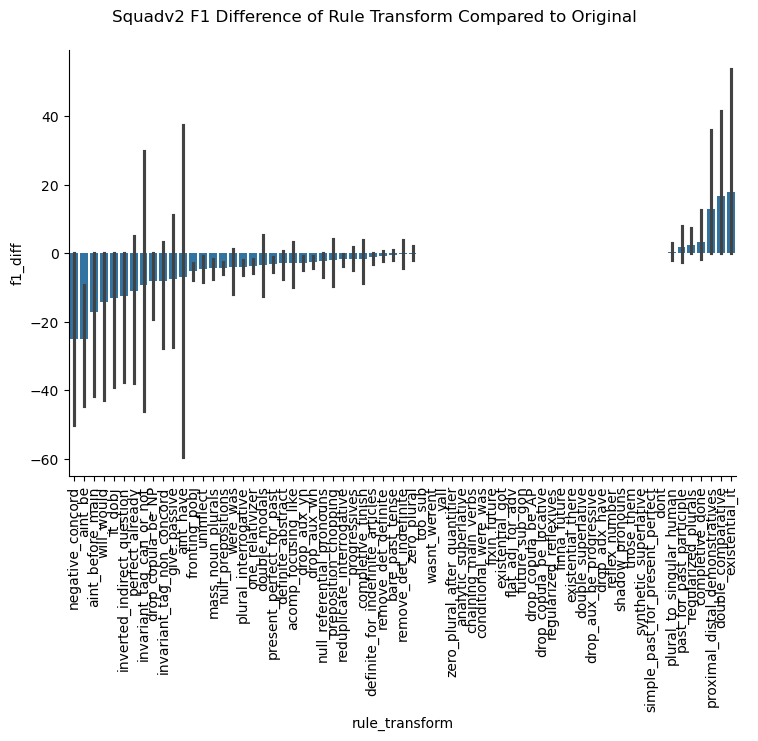

In [12]:
cp = sns.catplot(kind="bar", data = combined_df, x="rule_transform", order=cat_order, y="f1_diff", errorbar=("ci", 95), height=5, aspect=1.5)

cp.tick_params(axis='x', rotation=90)
cp.fig.suptitle('Squadv2 F1 Difference of Rule Transform Compared to Original', y=1.05)

## top 15 diffs 

In [94]:
top_15_diffs = cat_order[:30]
top_15_df = combined_df[combined_df["rule_transform"].isin(top_15_diffs)]

Text(0.5, 1.05, 'Squadv2 F1 Difference of Rule Transform Compared to Original')

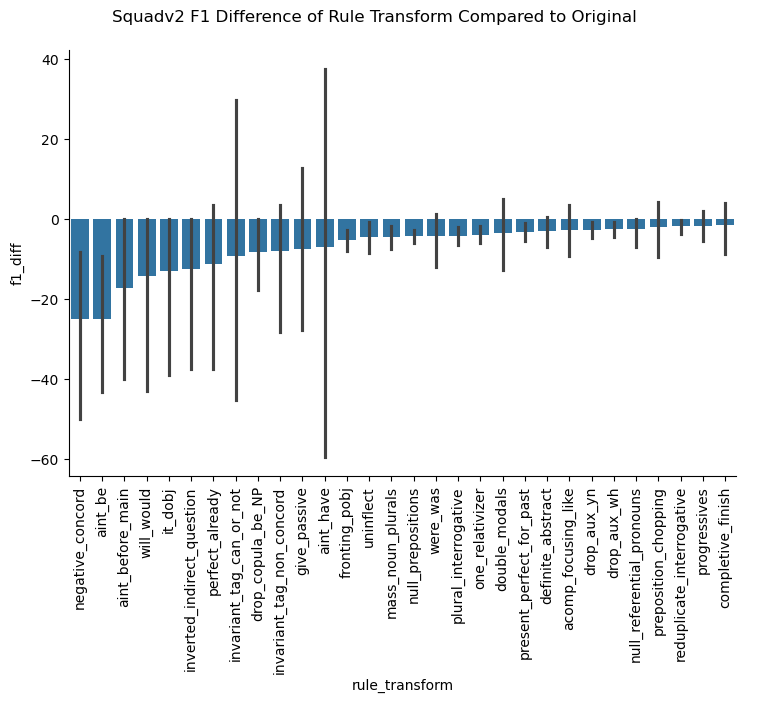

In [95]:
cp = sns.catplot(kind="bar", data = top_15_df, x="rule_transform", order=top_15_diffs, y="f1_diff", errorbar=("ci", 95), height=5, aspect=1.5)

cp.tick_params(axis='x', rotation=90)
cp.fig.suptitle('Squadv2 F1 Difference of Rule Transform Compared to Original', y=1.05)

In [ ]:
top_15_df

## most applied diffs 

In [101]:
applied_counts = combined_df.groupby(['rule_transform'])["id"].count().reset_index()

In [102]:
over_50_counts = applied_counts[applied_counts["id"] > 50]

In [105]:
big_sample_df = combined_df[combined_df["rule_transform"].isin(over_50_counts["rule_transform"])]

big_sample_diffs = big_sample_df.groupby(['rule_transform'])["f1_diff"].mean().sort_values().index

Text(0.5, 1.05, 'Squadv2 F1 Difference of Rule Transform Compared to Original')

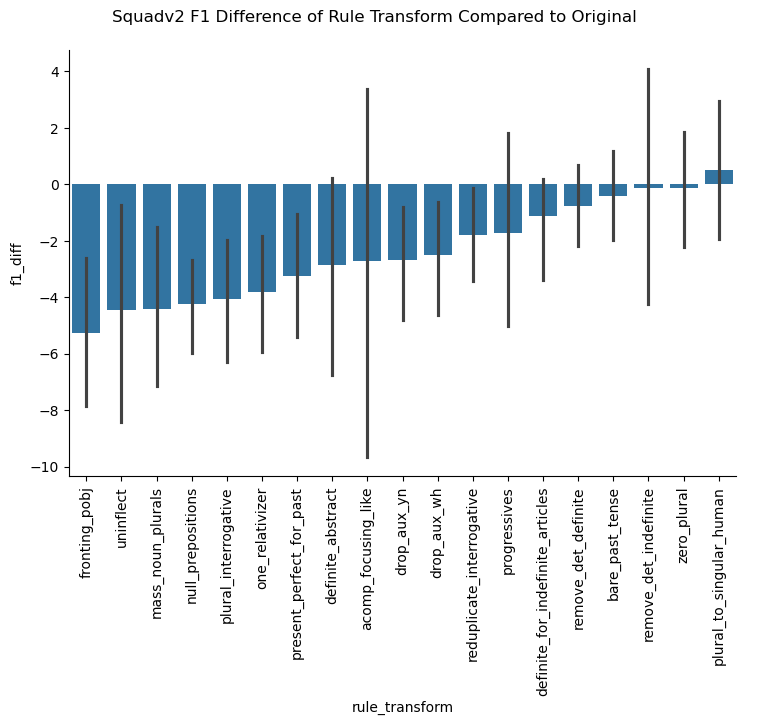

In [106]:
cp = sns.catplot(kind="bar", data = big_sample_df, x="rule_transform", order=big_sample_diffs, y="f1_diff", errorbar=("ci", 95), height=5, aspect=1.5)

cp.tick_params(axis='x', rotation=90)
cp.fig.suptitle('Squadv2 F1 Difference of Rule Transform Compared to Original', y=1.05)

# csv format 

In [14]:
csv_file = "data/boolq_transforms/test.csv"

df = pd.read_csv(csv_file)
df = df.drop(columns=["Unnamed: 0"])
df["answer"] = df["answer"].apply(lambda x: "yes" if x == True else "no")

In [15]:
df.to_csv(csv_file)

# make dev set for mmlu

In [ ]:
from datasets import load_dataset

ds = load_dataset("hails/mmlu_no_train", "all")

In [ ]:
dev_df = ds["dev"].to_pandas()


In [ ]:
test_file = "~/Dialect_Bias/data/mmlu/original_subset/test.csv"
test_df = pd.read_csv(test_file)

In [31]:
test_df

,question,subject,choices,answer,id
0,Which of the following best describes the bala...,high_school_government_and_politics,['Freedom of speech is protected except in cer...,3,0
1,Which of the following statements does NOT acc...,high_school_government_and_politics,['Registered voters between the ages of 35 and...,1,1
2,Which of the following plays the most signific...,high_school_government_and_politics,['The geographical area in which the child gro...,1,2
3,What power was granted to the states by the Ar...,high_school_government_and_politics,['Coining money' 'Authorizing constitutional a...,0,3
4,The primary function of political action commi...,high_school_government_and_politics,['contribute money to candidates for election'...,0,4
...,...,...,...,...,...
11667,Why were the elite of state societies so consp...,prehistory,['Democracy and egalitarian states had not yet...,3,11667
11668,The presence of caribou bones found near the H...,prehistory,['that the main food source was caribou meat.'...,1,11668
11669,Experiments with stone spear points made to re...,prehistory,['made and used spears with stone projectile p...,0,11669
11670,What is the date of the first evidence of the ...,prehistory,['1200 B.P.' '3100 B.P.' '5100 B.P.' '6200 B.P.'],1,11670


In [33]:
dev_df["id"] = range(len(test_df), len(test_df) + len(dev_df))

In [ ]:
file_path = "//Dialect_Bias/data/mmlu/original_subset/dev.csv"

dev_df.to_csv(file_path, index=False)

# error analysis 

In [20]:
combined_df = combined_df.drop(columns=["Unnamed: 0"])

In [21]:
combined_df

,rule_transform,id,f1,exact,transformed_text,context,answers,executed_rules_list,predictions,question,original_question_length,original_context_length,original_f1,original_pred,f1_diff
0,acomp_focusing_like,5733ce494776f4190066129c,50.000000,0.0,The delay in support by certain powerful membe...,The Convention came into force as internationa...,"{'answer_start': array([601], dtype=int32), 't...",['acomp_focusing_like'],"{'id': '5733ce494776f4190066129c', 'no_answer_...",The delay in support by certain powerful membe...,19,122,50.000000,"{'id': '5733ce494776f4190066129c', 'no_answer_...",0.0
1,acomp_focusing_like,5a51c265b308da001a5a237c,0.000000,0.0,What industry is like strong in Cambodia?,Tourism has been a key factor in economic deve...,"{'answer_start': array([], dtype=int32), 'text...",['acomp_focusing_like'],"{'id': '5a51c265b308da001a5a237c', 'no_answer_...",What industry is strong in Cambodia?,6,130,0.000000,"{'id': '5a51c265b308da001a5a237c', 'no_answer_...",0.0
2,acomp_focusing_like,56e6f41a6fe0821900b8ec68,100.000000,100.0,"Along with Freddie Jackson, Johnny Gill, Teena...",A format called quiet storm is often included ...,"{'answer_start': array([383], dtype=int32), 't...",['acomp_focusing_like'],"{'id': '56e6f41a6fe0821900b8ec68', 'no_answer_...","Along with Freddie Jackson, Johnny Gill, Teena...",23,75,0.000000,"{'id': '56e6f41a6fe0821900b8ec68', 'no_answer_...",100.0
3,acomp_focusing_like,5ad68d38191832001aa7b1a0,0.000000,0.0,In which century did the process become like l...,Its knowledge and uses spread from China throu...,"{'answer_start': array([], dtype=int32), 'text...",['acomp_focusing_like'],"{'id': '5ad68d38191832001aa7b1a0', 'no_answer_...",In which century did the process become less c...,11,85,0.000000,"{'id': '5ad68d38191832001aa7b1a0', 'no_answer_...",0.0
4,acomp_focusing_like,5726dc14708984140094d3df,100.000000,100.0,What inferior versions of movies are like avai...,"To prevent piracy of films, the standard drill...","{'answer_start': array([768], dtype=int32), 't...",['acomp_focusing_like'],"{'id': '5726dc14708984140094d3df', 'no_answer_...",What inferior versions of movies are available...,17,147,100.000000,"{'id': '5726dc14708984140094d3df', 'no_answer_...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,zero_plural_after_quantifier,572957d1af94a219006aa2ea,100.000000,100.0,What three thing does the tax system depend on?,"Bermuda is an offshore financial centre, which...","{'answer_start': array([443], dtype=int32), 't...",['zero_plural_after_quantifier'],"{'id': '572957d1af94a219006aa2ea', 'no_answer_...",What three things does the tax system depend on?,9,111,100.000000,"{'id': '572957d1af94a219006aa2ea', 'no_answer_...",0.0
7004,zero_plural_after_quantifier,5726893c5951b619008f7625,57.142857,0.0,Who did The Sun support in the 1984-85 Miner' ...,"The Sun, during the Miners' strike of 1984–85,...","{'answer_start': array([57], dtype=int32), 'te...",['zero_plural_after_quantifier'],"{'id': '5726893c5951b619008f7625', 'no_answer_...",Who did The Sun support in the 1984-85 Miners'...,10,139,57.142857,"{'id': '5726893c5951b619008f7625', 'no_answer_...",0.0
7005,zero_plural_after_quantifier,5732978b0342181400a2028d,100.000000,100.0,Which two large ocean existed during the Carbo...,The Carboniferous was a time of active mountai...,"{'answer_start': array([665], dtype=int32), 't...",['zero_plural_after_quantifier'],"{'id': '5732978b0342181400a2028d', 'no_answer_...",Which two large oceans existed during the Carb...,9,145,100.000000,"{'id': '5732978b0342181400a2028d', 'no_answer_...",0.0
7006,zero_plural_after_quantifier,5ace471732bba1001ae4a17a,100.000000,100.0,"In what year was 16,935 student enrolled in th...",Public schools are part of the Ann Arbor Publi...,"{'answer_start': array([], dtype=int32), 'text...",['zero_plural_after_quantifier'],"{'id': '5ace471732bba1001ae4a17a', 'no_answer_...","In what year was 16,935 students enrolled in t...",13,140,100.000000,"{'id': '5ace4

In [47]:

def look_at_orig_and_transformed(row, orig_col = "question", trans_col = "transformed_text", answer_col = "answers", pred_col="predictions", orig_pred="original_pred"):
    print("Original question:", row[orig_col], )
    print("answer:", row[answer_col])
    print("original prediction:", row[orig_pred])
    print("Transformed question:", row[trans_col],)
    print("predictions:", row[pred_col])
    print()


# rule = "negative_concord" # most things don't have answers, meant to be trick questions 
# rule = "fronting_pobj" # most things have answers, drop is modest 
# rule = "mass_noun_plurals" # the plurals sometimes just make it go off the rails 
# rule = "null_prepositions" # the plurals sometimes just make it go off the rails 
# rule="uninflect" # the answers might overgenerate and say right things but be judged wrong? 
# rule = "one_relativizer"

rule="one_relativizer"
better_perf_slice = combined_df[(combined_df["rule_transform"] == rule) & (combined_df["f1_diff"] > 0 )]
same_perf_slice = combined_df[(combined_df["rule_transform"] == rule) & (combined_df["f1_diff"] == 0 )]
same_or_better = combined_df[(combined_df["rule_transform"] == rule) & (combined_df["f1_diff"] >= 0 )]
worse_perf_slice = combined_df[(combined_df["rule_transform"] == rule) & (combined_df["f1_diff"] < 0 )]

print("better perf after transform", len(better_perf_slice))
better_perf_slice.sample(n=2, random_state=42).apply(look_at_orig_and_transformed, axis=1)

print("same perf after transformed", len(same_perf_slice))
same_or_better.sample(n=3, random_state=42).apply(look_at_orig_and_transformed, axis=1)

print("worse perf after transformed",  len(worse_perf_slice))
worse_perf_slice.sample(n=3, random_state=0).apply(look_at_orig_and_transformed, axis=1)
    

better perf after transform 37
Original question: When are Internet Archive timestamps useful for patent offices?
answer: {'answer_start': array([375], dtype=int32), 'text': array(['in examining a patent application'], dtype=object)}
original prediction: {'id': '56ddca9d9a695914005b95d7', 'no_answer_probability': 0.0, 'prediction_text': 'These dates are used to determine if a Web page is available as prior art for instance in examining a'}
Transformed question: When are Internet Archive timestamps useful for patent offices one?
predictions: {'id': '56ddca9d9a695914005b95d7', 'no_answer_probability': 0.0, 'prediction_text': 'to determine if a Web page is available as prior art in examining a patent application.'}

Original question: What encourages child labour across the globe?
answer: {'answer_start': array([292], dtype=int32), 'text': array(['Macroeconomic'], dtype=object)}
original prediction: {'id': '57277611708984140094de42', 'no_answer_probability': 0.0, 'prediction_text': 'Macro

4016    None
3718    None
3945    None
dtype: object

In [48]:
better_perf_slice["f1_diff"].describe()
# better_perf_slice["f1_diff"]

count     37.000000
mean      60.115823
std       39.040987
min        2.333333
25%       23.076923
50%       63.636364
75%      100.000000
max      100.000000
Name: f1_diff, dtype: float64

In [49]:
worse_perf_slice["f1_diff"].describe()

count     69.000000
mean     -74.239014
std       31.111253
min     -100.000000
25%     -100.000000
50%      -88.888889
75%      -50.000000
max       -3.759398
Name: f1_diff, dtype: float64

# Reassociation json Code

In [58]:
def clean_executed_rules(x): 
    rule_dict = ast.literal_eval(x)
    return [v["type"] for _ , v in rule_dict.items()] if x else []

def get_relevant_info(rules_df, metric="acc"): 
    rules_df["id"] = rules_df["doc"].apply(lambda d: d["id"])
    rules_df["rule_transform"] = rules_df["doc"].apply(lambda d: d["rule_transform"])
    rules_df["transformed_text"] = rules_df["doc"].apply(lambda d: d["transformed_text"])
    rules_df["rules_executed"] = rules_df["doc"].apply(lambda d: d["rules_executed"])
    rules_df["rules_executed_list"] = rules_df["rules_executed"].apply(clean_executed_rules)
    rules_df["acc"] = rules_df[metric]
    
    # rules_df_slice = rules_df[["id", "transformed_text", "rule_transform", "acc", "filtered_resps", "rules_executed_list"]]
    # just for mmlu, 
    rules_df_slice = rules_df[["id", "transformed_text", "rule_transform", "acc","filtered_resps", "rules_executed_list"]]

    return rules_df_slice

def get_baseline_info(subset_df,  metric="acc"): 
    subset_df["id"] = subset_df["doc"].apply(lambda d: d["id"])
    subset_df["orig_question"] = subset_df["doc"].apply(lambda d: d["question"])
    subset_df["acc"] = subset_df[metric]
    subset_df_slice = subset_df[["id", "orig_question", "acc", "filtered_resps"]]
    return subset_df_slice

def merge_transform_and_baseline(dialect_slice, baseline_slice, transform_suffix="dialect"): 
    combined_df = pd.merge(dialect_slice, baseline_slice, on="id", how="left", suffixes=(f"_{transform_suffix}", "_orig"))
    
    return combined_df

def plot_rules(combined_df, title="BoolQ", topk=15, threshold=50, metric_diff="Accuracy Difference", percentage=True):
    # rules_slice = get_relevant_info(rules_df)
    # subset_slice = get_baseline_info(subset_df)
    if percentage: 
        # convert metric_diff to percentage
        new_metric_diff = "Accuracy Difference (%)"
        combined_df[new_metric_diff] = combined_df[metric_diff]*100
        metric_diff = new_metric_diff
    
    cat_order = combined_df.groupby(['rule_transform'])[metric_diff].mean().sort_values().index
    # only consider rules applied to at least least 5% of data
    # threshold = len(subset_slice)/20

    applied_counts = combined_df.groupby(['rule_transform'])["id"].count().reset_index()
    over_50_counts = applied_counts[applied_counts["id"] > threshold]

    big_sample_df = combined_df[combined_df["rule_transform"].isin(over_50_counts["rule_transform"])]
    big_sample_diffs = big_sample_df.groupby(['rule_transform'])[metric_diff].mean().sort_values().index
    top_k = big_sample_diffs[:topk]


    big_sample_df = big_sample_df[big_sample_df["rule_transform"].isin(top_k)]
    if topk == 10: 
        height = 4
        aspect = 1.85
    elif topk == 5: 
        height = 3
        aspect = 2.5
        # aspect = 2.2
    else: 
        height = 6
        aspect = 1.25

    cp = sns.catplot(kind="bar", data = big_sample_df, y="rule_transform", order=top_k, x=metric_diff, errorbar=("ci", 95), height=height, aspect=aspect)

    cp.tick_params(axis='x', rotation=90)
    # cp.fig.suptitle('BoolQ Accuracy Difference of Rule Transform Compared to Original', y=1.05)
    cp.fig.suptitle(title, y=1.05)

    ax = cp.ax  # get the single axes object from catplot
    for p in ax.patches:
        value = p.get_width()
        x_pos = value - 0.2 * ax.get_xlim()[0]  # small offset to the right
        y_pos = p.get_y() + p.get_height() / 2
        ax.text(x_pos, y_pos, f'{value:.1f}', va='center', color='white')

    # plt.tight_layout()

def get_metric_diffs(orig_df, transformed_df, model="gemma", transform_suffix="dialect", metric_diff="Accuracy Difference"):
    metric= "exact_match" if model == "gpt4o-mini" else "acc"
    print(metric)
    transform_slice = get_relevant_info(transformed_df, metric=metric)
    subset_slice = get_baseline_info(orig_df, metric=metric)
    
    combined_df = merge_transform_and_baseline(transform_slice, subset_slice, transform_suffix=transform_suffix)
    combined_df[metric_diff] = combined_df[f"acc_{transform_suffix}"] - combined_df[f"acc_orig"] 
    return combined_df
    
model_mapping = {
    "gpt4o-mini" : "gpt-4o-mini", 
    "gemma": "google__gemma-2b",
    "mistral-7b": "mistralai__Mistral-7B-Instruct-v0.3",
}

base_path = "data/"


# BoolQ jsonl analysis

In [ ]:
import jsonlines
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd 
import ast 

dataset = "boolq"

# model = "gemma"
# model = "mistral-7b"
model = "gpt4o-mini"


subset_log_path = base_path + f"{dataset}/original_subset/lm_eval_results/{model_mapping[model]}/samples.jsonl"
dialects_log_path = base_path + f"{dataset}/dialect_transforms/lm_eval_results/{model_mapping[model]}/samples.jsonl"
rules_log_path = base_path + f"{dataset}/A_transforms/lm_eval_results/{model_mapping[model]}/samples.jsonl"

subset_df = pd.read_json(subset_log_path, lines=True)
dialect_df = pd.read_json(dialects_log_path, lines=True)
rules_df = pd.read_json(rules_log_path, lines=True)

## dialect

In [ ]:
combined_df = get_metric_diffs(subset_df, dialect_df, model=model, transform_suffix="dialect")

#keeping same for gpt4o-mini as well
metric_diff = "Accuracy Difference"
cat_order = combined_df.groupby(['rule_transform'])[metric_diff].mean().sort_values().index

# applied_counts = combined_df.groupby(['rule_transform'])["id"].count().reset_index()
# over_50_counts = applied_counts[applied_counts["id"] > 50]

# big_sample_df = combined_df[combined_df["rule_transform"].isin(over_50_counts["rule_transform"])]
# big_sample_diffs = big_sample_df.groupby(['rule_transform'])[metric_diff].mean().sort_values().index

cp = sns.catplot(kind="bar", data = combined_df, y="rule_transform", order=cat_order, x=metric_diff, errorbar=("ci", 95), height=5, aspect=1.5)

cp.tick_params(axis='x', rotation=90)
cp.fig.suptitle('BoolQ Acc Difference of Dialect Transform Compared to Original', y=1.05)

In [15]:
# combined_df.groupby(["rule_transform"])["acc_dialect"].mean()
combined_df.groupby(["rule_transform"])["exact_match_dialect"].mean()

rule_transform
Appalachian English                          0.864463
Chicano English                              0.873556
Colloquial Singapore English (Singlish)      0.845635
Indian English                               0.853979
Southeast American enclave dialects          0.859007
Urban African American Vernacular English    0.859007
Name: exact_match_dialect, dtype: float64

## By rule

In [28]:
combined_df = get_metric_diffs(subset_df, rules_df, model=model, transform_suffix="rule")
# conditioning on SAE accurate! 
combined_df = combined_df[combined_df["acc_orig"]==1]

exact_match


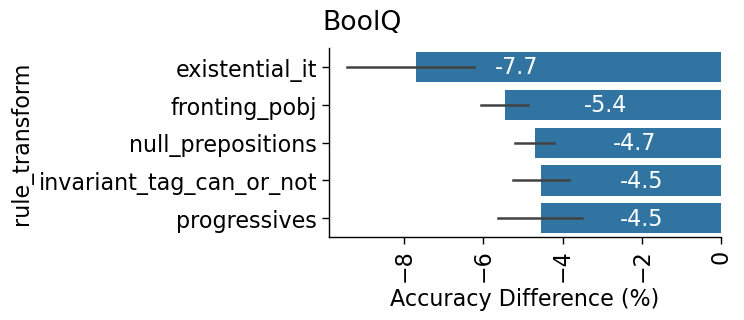

In [29]:
sns.set_context("paper", rc={"font.size": 16, "axes.titlesize": 14, "axes.labelsize": 16,
                                "xtick.labelsize": 16, "ytick.labelsize": 16, "legend.fontsize": 14})

plot_rules(combined_df, topk=5, threshold=len(subset_df)/20, percentage=True)


# SciQ 

In [37]:
import jsonlines

dataset = "sciq"
# model = "gemma"
# model = "mistral-7b"
model = "gpt4o-mini"


subset_log_path = base_path + f"{dataset}/original_subset/lm_eval_results/{model_mapping[model]}/samples.jsonl"
dialects_log_path = base_path + f"{dataset}/dialect_transforms/lm_eval_results/{model_mapping[model]}/samples.jsonl"
rules_log_path = base_path + f"{dataset}/A_transforms/lm_eval_results/{model_mapping[model]}/samples.jsonl"

subset_df = pd.read_json(subset_log_path, lines=True)
rules_df = pd.read_json(rules_log_path, lines=True)
dialect_df = pd.read_json(dialects_log_path, lines=True)

## dialect

Text(0.5, 1.05, 'SciQ Acc Difference of Dialect Transform Compared to Original')

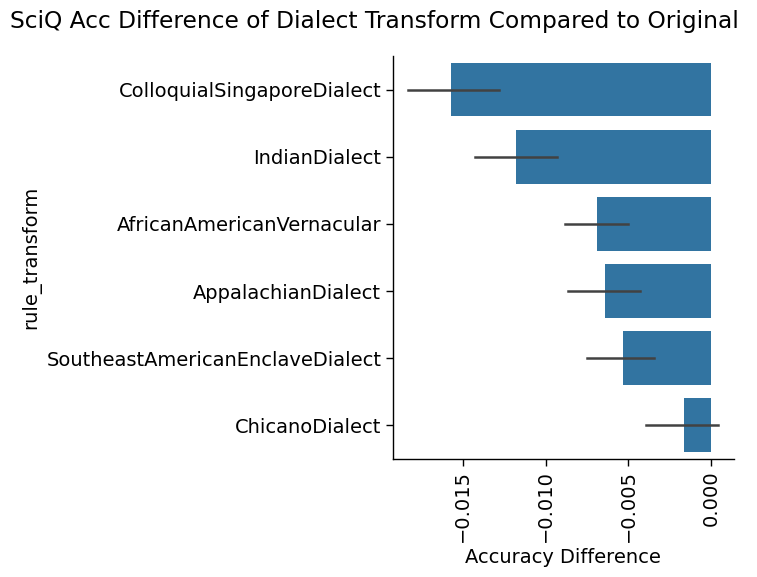

In [50]:
combined_df = get_metric_diffs(subset_df, dialect_df, model=model, transform_suffix="dialect")
metric_diff = "Accuracy Difference"
cat_order = combined_df.groupby(['rule_transform'])[metric_diff].mean().sort_values().index

applied_counts = combined_df.groupby(['rule_transform'])["id"].count().reset_index()
over_50_counts = applied_counts[applied_counts["id"] > 50]

big_sample_df = combined_df[combined_df["rule_transform"].isin(over_50_counts["rule_transform"])]
big_sample_diffs = big_sample_df.groupby(['rule_transform'])[metric_diff].mean().sort_values().index

cp = sns.catplot(kind="bar", data = big_sample_df, x=metric_diff, order=big_sample_diffs, y="rule_transform", errorbar=("ci", 95), height=5, aspect=1.5)

cp.tick_params(axis='x', rotation=90)
cp.fig.suptitle('SciQ Acc Difference of Dialect Transform Compared to Original', y=1.05)

In [51]:
# combined_df.groupby(["rule_transform"])["acc_dialect"].mean()
combined_df.groupby(["rule_transform"])["exact_match_dialect"].mean()

rule_transform
AfricanAmericanVernacular          0.970205
AppalachianDialect                 0.972160
ChicanoDialect                     0.976185
ColloquialSingaporeDialect         0.961261
IndianDialect                      0.965265
SoutheastAmericanEnclaveDialect    0.972073
Name: exact_match_dialect, dtype: float64

## Rules 

In [38]:
combined_df = get_metric_diffs(subset_df, rules_df, model=model, transform_suffix="rule")
# conditioning on SAE accurate! 
combined_df = combined_df[combined_df["acc_orig"]==1]

exact_match


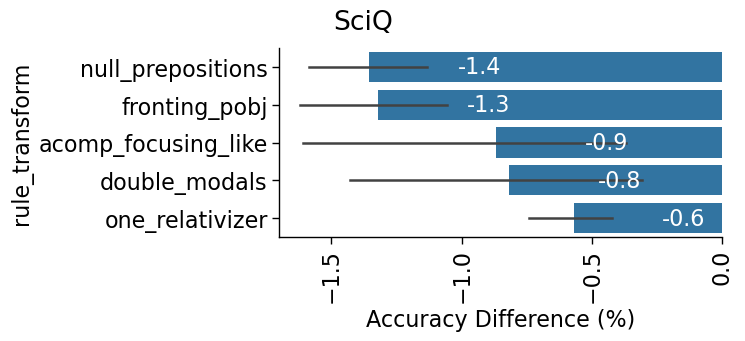

In [39]:
sns.set_context("paper", rc={"font.size": 16, "axes.titlesize": 16, "axes.labelsize": 16,
                                "xtick.labelsize": 16, "ytick.labelsize": 16, "legend.fontsize": 14})

plot_rules(combined_df, topk=5, threshold=len(subset_df)/20, title="SciQ", percentage=True)

# MMLU 

In [55]:
import glob 

dataset = "mmlu"
# model = "gemma"
# model = "mistral-7b"
model = "gpt4o-mini"

subset_log_path = base_path + f"{dataset}/original_subset/lm_eval_results/{model_mapping[model]}/samples*.jsonl"
dialects_log_path = base_path + f"{dataset}/dialect_transforms/lm_eval_results/{model_mapping[model]}/samples*.jsonl"
rules_log_path = base_path + f"{dataset}/A_transforms/lm_eval_results/{model_mapping[model]}/samples*.jsonl"

def load_files_matching(search_pattern): 
    file_list = glob.glob(search_pattern)
    df_list = []

    for fp in file_list: 
        df = pd.read_json(fp, lines=True)
        df_list.append(df)
    return pd.concat(df_list)

dialect_df = load_files_matching(dialects_log_path)
rules_df = load_files_matching(rules_log_path)
subset_df = load_files_matching(subset_log_path)

## dialect

In [60]:
combined_df = get_metric_diffs(subset_df, dialect_df, model=model, transform_suffix="dialect")

In [61]:
# combined_df.groupby(["rule_transform"])["acc_dialect"].mean()
combined_df.groupby(["rule_transform"])["exact_match_dialect"].mean()

rule_transform
AfricanAmericanVernacular          0.692273
AppalachianDialect                 0.686989
ChicanoDialect                     0.654312
ColloquialSingaporeDialect         0.686876
IndianDialect                      0.688160
SoutheastAmericanEnclaveDialect    0.698026
Name: exact_match_dialect, dtype: float64

In [69]:
combined_df.groupby(["rule_transform"])["acc_diff"].mean()

rule_transform
AfricanAmericanVernacular         -0.016008
AppalachianDialect                -0.011047
ChicanoDialect                    -0.003544
ColloquialSingaporeDialect        -0.027816
IndianDialect                     -0.018522
SoutheastAmericanEnclaveDialect   -0.014384
Name: acc_diff, dtype: float64

## rules 

In [56]:
combined_df = get_metric_diffs(subset_df, rules_df, model=model, transform_suffix="rule")
# conditioning on SAE accurate! 
combined_df = combined_df[combined_df["acc_orig"]==1]

exact_match


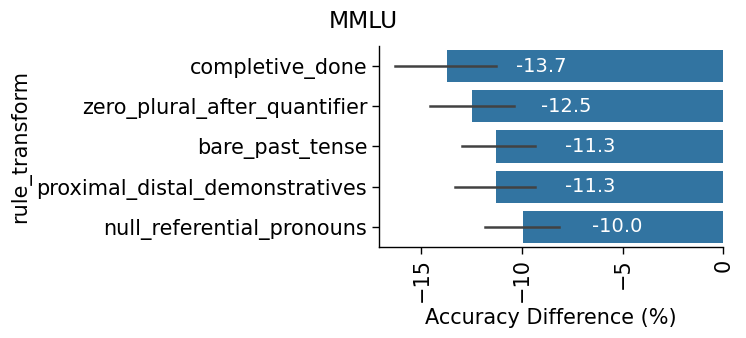

In [59]:
sns.set_context("paper", rc={"font.size": 14, "axes.titlesize": 14, "axes.labelsize": 15,
                                "xtick.labelsize": 15, "ytick.labelsize": 15, "legend.fontsize": 14})
# sns.set_context("paper", rc={"font.size": 16, "axes.titlesize": 16, "axes.labelsize": 16,
#                                 "xtick.labelsize": 16, "ytick.labelsize": 16, "legend.fontsize": 14})

plot_rules(combined_df, topk=5, threshold=len(subset_df)/20, title="MMLU", percentage=True)

# Examples from each dataset

In [124]:
import jsonlines

dataset = "sciq"
model = "gpt4o-mini"
# model = "gemma"
# model = "mistral-7b"

subset_log_path = base_path + f"{dataset}/original_subset/lm_eval_results/{model_mapping[model]}/samples.jsonl"
# dialects_log_path = base_path + f"{dataset}/dialect_transforms/lm_eval_results/{model_mapping[model]}/samples.jsonl"
rules_log_path = base_path + f"{dataset}/A_transforms/lm_eval_results/{model_mapping[model]}/samples.jsonl"

subset_df = pd.read_json(subset_log_path, lines=True)
# dialect_df = pd.read_json(dialects_log_path, lines=True)
rules_df = pd.read_json(rules_log_path, lines=True)

In [ ]:
import glob 
dataset = "mmlu"
model = "gpt4o-mini"

def get_relevant_info(rules_df, metric="acc"): 
    rules_df["id"] = rules_df["doc"].apply(lambda d: d["id"])
    rules_df["rule_transform"] = rules_df["doc"].apply(lambda d: d["rule_transform"])
    rules_df["transformed_text"] = rules_df["doc"].apply(lambda d: d["transformed_text"])
    rules_df["choices"] = rules_df["doc"].apply(lambda d: d["choices"])
    rules_df["acc"] = rules_df[metric]
    rules_df["rules_executed"] = rules_df["doc"].apply(lambda d: d["rules_executed"])
    rules_df["rules_executed_list"] = rules_df["rules_executed"].apply(clean_executed_rules)
    
    # rules_df_slice = rules_df[["id", "transformed_text", "rule_transform", metric, "filtered_resps", "rules_executed_list"]]
    # just for mmlu, 
    rules_df_slice = rules_df[["id", "transformed_text", "rule_transform", "acc", "choices", "filtered_resps", "rules_executed_list"]]

    return rules_df_slice

subset_log_path = base_path + f"{dataset}/original_subset/lm_eval_results/{model_mapping[model]}/samples*.jsonl"
# dialects_log_path = base_path + f"{dataset}/dialect_transforms/lm_eval_results/{model_mapping[model]}/samples*.jsonl"
rules_log_path = base_path + f"{dataset}/A_transforms/lm_eval_results/{model_mapping[model]}/samples*.jsonl"

def load_files_matching(search_pattern): 
    file_list = glob.glob(search_pattern)
    df_list = []

    for fp in file_list: 
        df = pd.read_json(fp, lines=True)
        df_list.append(df)
    return pd.concat(df_list)

# dialect_df = load_files_matching(dialects_log_path)
rules_df = load_files_matching(rules_log_path)
subset_df = load_files_matching(subset_log_path)

In [134]:
# combined_df = get_metric_diffs(subset_df, dialect_df, model=model, transform_suffix="dialect")
# rule_of_interest = "existential_it"
rule_of_interest = "yall"
# rule_of_interest = "drop_copula_be_NP"

combined_df = get_metric_diffs(subset_df, rules_df, model=model, transform_suffix="rule")
combined_df = combined_df[combined_df["Accuracy Difference"] < 0]
rule_df = combined_df[combined_df["rule_transform"] == rule_of_interest]

exact_match


In [135]:
rule_df

,id,transformed_text,rule_transform,acc_rule,filtered_resps_rule,rules_executed_list,orig_question,acc_orig,filtered_resps_orig,Accuracy Difference
10416,4409,What should y'all use to protect your eyes fro...,yall,0,[certain goggles],[yall],What should you use to protect your eyes from ...,1,[eye goggles],-1


In [118]:
# combined_df[combined_df["rule_transform"] == "AfricanAmericanVernacular"]
# combined_df[(combined_df["Accuracy Difference"] < 0)].sample(10)
rule_df.sample(10)

,id,transformed_text,rule_transform,acc_rule,choices,filtered_resps_rule,rules_executed_list,orig_question,acc_orig,filtered_resps_orig,Accuracy Difference
86855,9628,Both over-the-counter niacin and the prescript...,drop_copula_be_NP,0,[Niacin lowers cholesterol an average of 18 po...,[D. None of the above.],[drop_copula_be_NP],Both over-the-counter niacin and the prescript...,1,[D],-1
9572,8073,A 50-year-old woman comes to the office for th...,drop_copula_be_NP,0,"[Conversion disorder, Histrionic personality d...",[D. Somatic symptom disorder],[drop_copula_be_NP],A 50-year-old woman comes to the office for th...,1,[D],-1
27028,3477,In a two-variable situation in which one varia...,drop_copula_be_NP,0,"[Point-biserial, Spearman's rho, Phi coefficie...",[A. Point-biserial],[drop_copula_be_NP],In a two-variable situation in which one varia...,1,[A],-1
60240,7642,Ross's moral theory a version of,drop_copula_be_NP,0,"[consequentialism., the ethics of prime facie ...",[B. the ethics of prime facie duty.],[drop_copula_be_NP],Ross's moral theory is a version of,1,[B],-1
62742,5578,This the process in which offerings move throu...,drop_copula_be_NP,0,"[Diffusion process., Product lifecycle., Adopt...",[B. Product lifecycle.],[drop_copula_be_NP],This is the process in which offerings move th...,1,[B],-1
40632,1379,Eli is just beginning to sit up. Assuming he i...,drop_copula_be_NP,0,"[1 month, 3 months, 6 months, 9 months]",[C. 6 months],[drop_copula_be_NP],Eli is just beginning to sit up. Assuming he i...,1,[C],-1
27005,3322,If a client has difficulty in learning new ada...,drop_copula_be_NP,0,"[reminiscence, retroactive inhibition, latent ...",[D. proactive inhibition],[drop_copula_be_NP],If a client has difficulty in learning new ada...,1,[D],-1
9537,8009,A sexually active 20-year-old woman has had fe...,drop_copula_be_NP,0,"[Chlamydia trachomatis, Haemophilus ducreyi, N...",[B. Haemophilus ducreyi],[drop_copula_be_NP],A sexually active 20-year-old woman has had fe...,1,[B],-1
6013,10344,Which fraction greater than 2 over 5?,drop_copula_be_NP,0,"[1 over 5, 1 over 10, 4 over 10, 5 over 10]",[C],[drop_copula_be_NP],Which fraction is greater than 2 over 5?,1,[D],-1
24115,1608,In a lap winding dc machine number of conducto...,drop_copula_be_NP,0,"[10, 100, 50, 1]",[C],"[drop_copula_be_NP, drop_copula_be_NP]",In a lap winding dc machine number of conducto...,1,[A],-1


In [136]:
i =  10416
print(rule_df.loc[i]["rules_executed_list"])
print(rule_df.loc[i]["orig_question"])
print(rule_df.loc[i]["transformed_text"])
print(rule_df.loc[i]["choices"])
# rule_df.loc[i]

['yall']
What should you use to protect your eyes from chemicals?
What should y'all use to protect your eyes from chemicals?


KeyError: 'choices'

In [ ]:
i =  17649
print(combined_df.iloc[i]["rules_executed_list"])
print(combined_df.iloc[i]["orig_question"])
print(combined_df.iloc[i]["transformed_text"])
print(combined_df.iloc[i]["choices"])
combined_df.iloc[i]

# boolq_ids = [56043, 35882, 1198, 16698, 42812, 19620]
# sciq_ids = [56594, 14660, 31848, 40851, 9935]
# mmlu_ids = [34389, 33952, 48338, 54179, 19331  ]

In [133]:
# combined_df[(combined_df["Accuracy Difference"] < 0)].sample(10)
combined_df[(combined_df["Accuracy Difference"] < 0) & (combined_df["rule_transform"] == "SoutheastAmericanEnclaveDialect")].sample(10)

,id,transformed_text,rule_transform,exact_match_dialect,choices,filtered_resps_dialect,rules_executed_list,orig_question,exact_match_orig,filtered_resps_orig,Accuracy Difference
53421,7997,A new bloods test for to detect prostate might...,SoutheastAmericanEnclaveDialect,0,[Incidence of chronic prostatitis in the gener...,[B],"[proximal_distal_demonstratives, regularized_p...",A new blood test to detect prostate cancer is ...,1,[D],-1
33055,10082,What value of y is making y + 2.9 = 11 true?,SoutheastAmericanEnclaveDialect,0,"[8.1, 8.9, 9.1, 13.9]",[C],[progressives],What value of y makes y + 2.9 = 11 true?,1,[A],-1
17526,7710,Norcross are agreeing for for a being is like ...,SoutheastAmericanEnclaveDialect,0,"[a moral patient., a moral agent., an object o...",[A],"[she_inanimate_objects, double_modals, negativ...",Norcross agrees that if a being is incapable ...,1,[B],-1
52449,11125,It is a serious trade disadvantage due to its ...,SoutheastAmericanEnclaveDialect,0,"[Singapore, Italy, Spain, Mongolia]",[D. Mongolia],"[clefting, clefting, clefting, clefting, cleft...",Which country faces a serious trade disadvanta...,1,[D],-1
17649,7840,Which of following ain't an objection Pence is...,SoutheastAmericanEnclaveDialect,0,[The argument assumes genetic determinism or g...,[B],"[aint_be, aint_be, aint_be, aint_be, progressi...",Which of the following is not an objection Pe...,1,[D],-1
1009,3697,A-Attempting to teach one new behaviors throug...,SoutheastAmericanEnclaveDialect,0,"[Emotional reactivity is often increased, Puni...",[B],"[mass_noun_plurals, indef_one, a_ing]",Attempting to teach a new behavior through the...,1,[A],-1
30489,11290,The dominant course for foreign policys throug...,SoutheastAmericanEnclaveDialect,0,"[containment., neoconservatism., isolationism....",[C. isolationism.],"[double_modals, mass_noun_plurals, mass_noun_p...",The dominant course for foreign policy through...,1,[C],-1
56705,1529,It is the most on the moon that what might wou...,SoutheastAmericanEnclaveDialect,0,"[A kilogram of feathers, Five pounds of bricks...",[A],"[double_modals, clefting, clefting, clefting, ...",What would weigh the most on the moon?,1,[C],-1
46890,10641,For which of these here two scenario the main ...,SoutheastAmericanEnclaveDialect,0,"[Wrong, Wrong, Wrong, Not wrong, Not wrong, Wr...",[C],"[progressives, proximal_distal_demonstratives,...",For which of these two scenarios does the main...,1,[D],-1
29003,4554,"Before the Masters and Johnson researchs, it w...",SoutheastAmericanEnclaveDialect,0,"[Cowper's gland, Prostate gland, Bartholin gla...",[C. Bartholin glands],"[for_complementizer, mass_noun_plurals]","Before the Masters and Johnson research, it wa...",1,[C],-1


In [129]:
combined_df[combined_df["transformed_text"] == "Taxicabs in a metropolitan area are drove an average of 75,000 mile per year with a standard deviation of 12,000 mile. What is the probability that a randomly selected cab have been drove less than 100,000 mile if it is knew that have been drove over 80,000 mile? Assume a normal distribution of miles per year among cabs."]

,id,transformed_text,rule_transform,exact_match_dialect,choices,filtered_resps_dialect,rules_executed_list,orig_question,exact_match_orig,filtered_resps_orig,Accuracy Difference
19331,9689,Taxicabs in a metropolitan area are drove an a...,ChicanoDialect,0,"[0.06, 0.34, 0.66, 0.94]",[C],"[zero_plural_after_quantifier, zero_plural_aft...",Taxicabs in a metropolitan area are driven an ...,1,[D],-1
